In [1]:
import cv2

def capture_webcam(output_file):
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Cannot open camera")
        exit()

    ret, frame = cap.read()

    if ret:
        cv2.imwrite(output_file, frame)
        print(f"Image saved as {output_file}")
    else:
        print("Failed to capture image")

    cap.release()
    cv2.destroyAllWindows()

In [72]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = "D:\\tesseract\\tesseract.exe"
img_file = "img/3.jpg"
img = cv2.imread(img_file)

In [73]:
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/28816046/displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)
    height = im_data.shape[0]
    width = im_data.shape[1]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

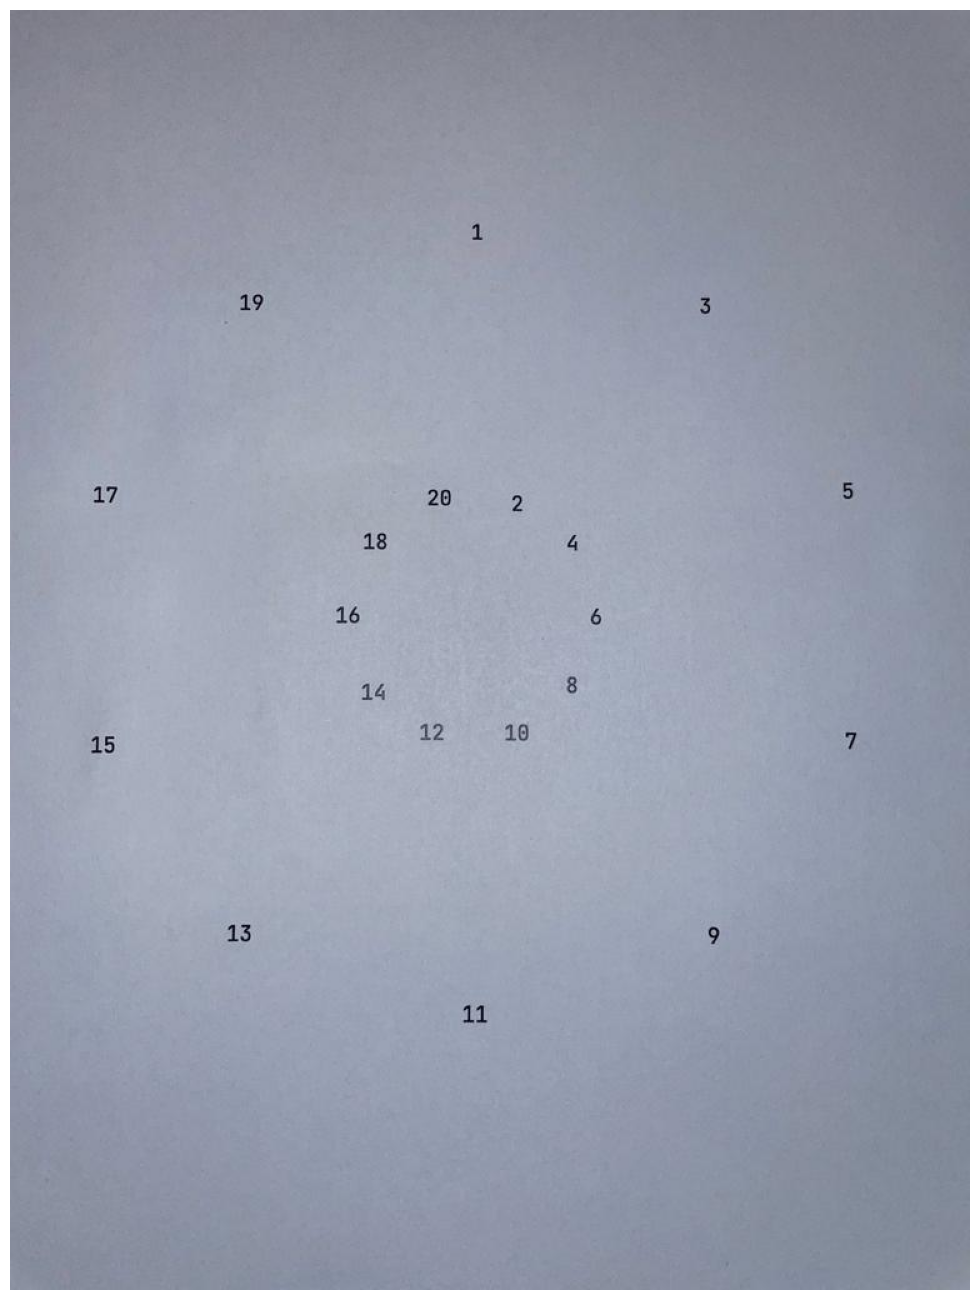

In [74]:
display(img_file)

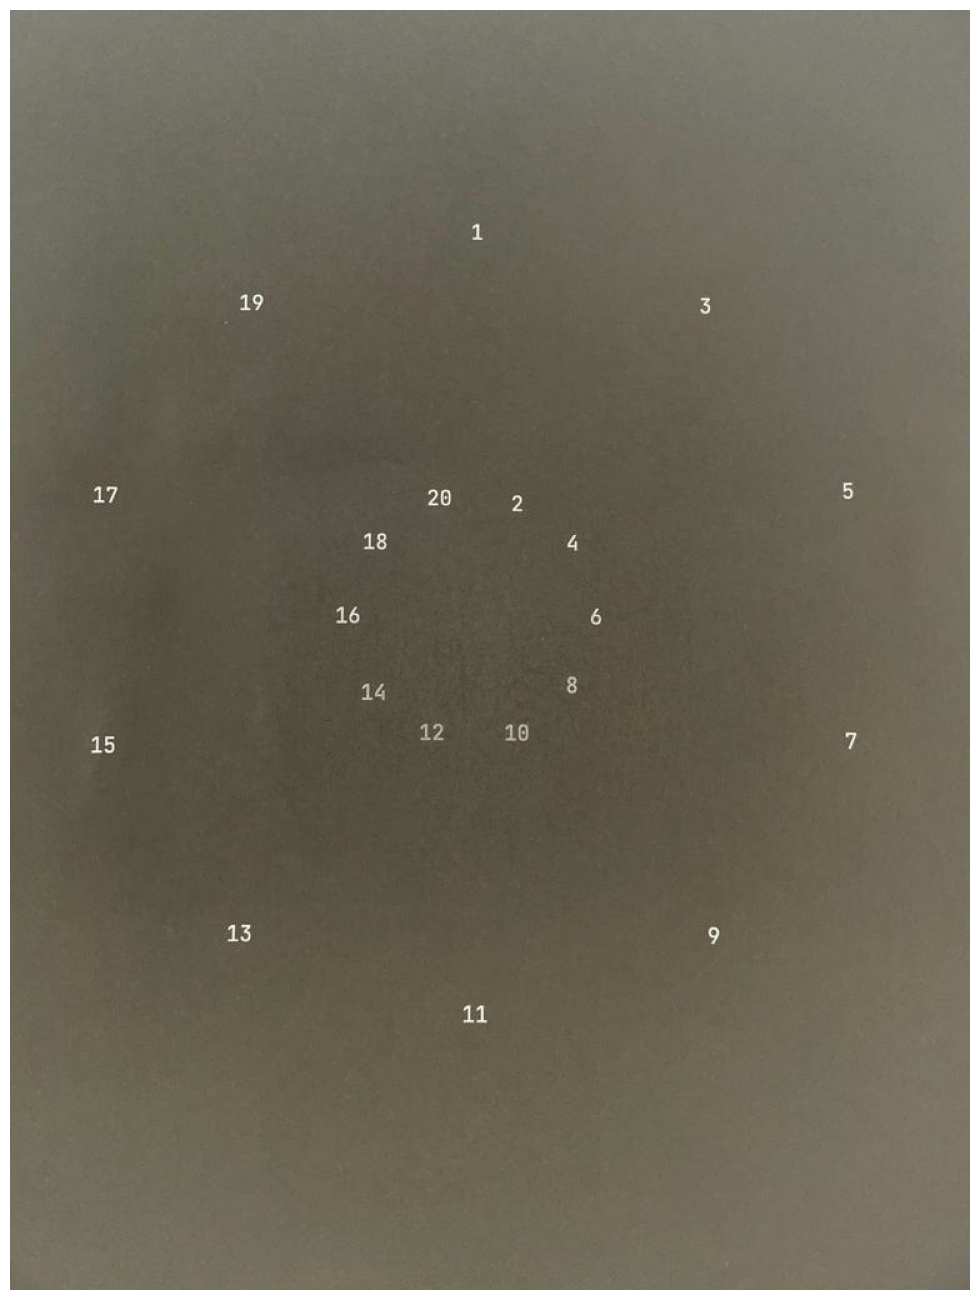

In [75]:
# Inverting Image
inverted_img = cv2.bitwise_not(img)
cv2.imwrite("img/inverted.jpg", inverted_img)
display("img/inverted.jpg")

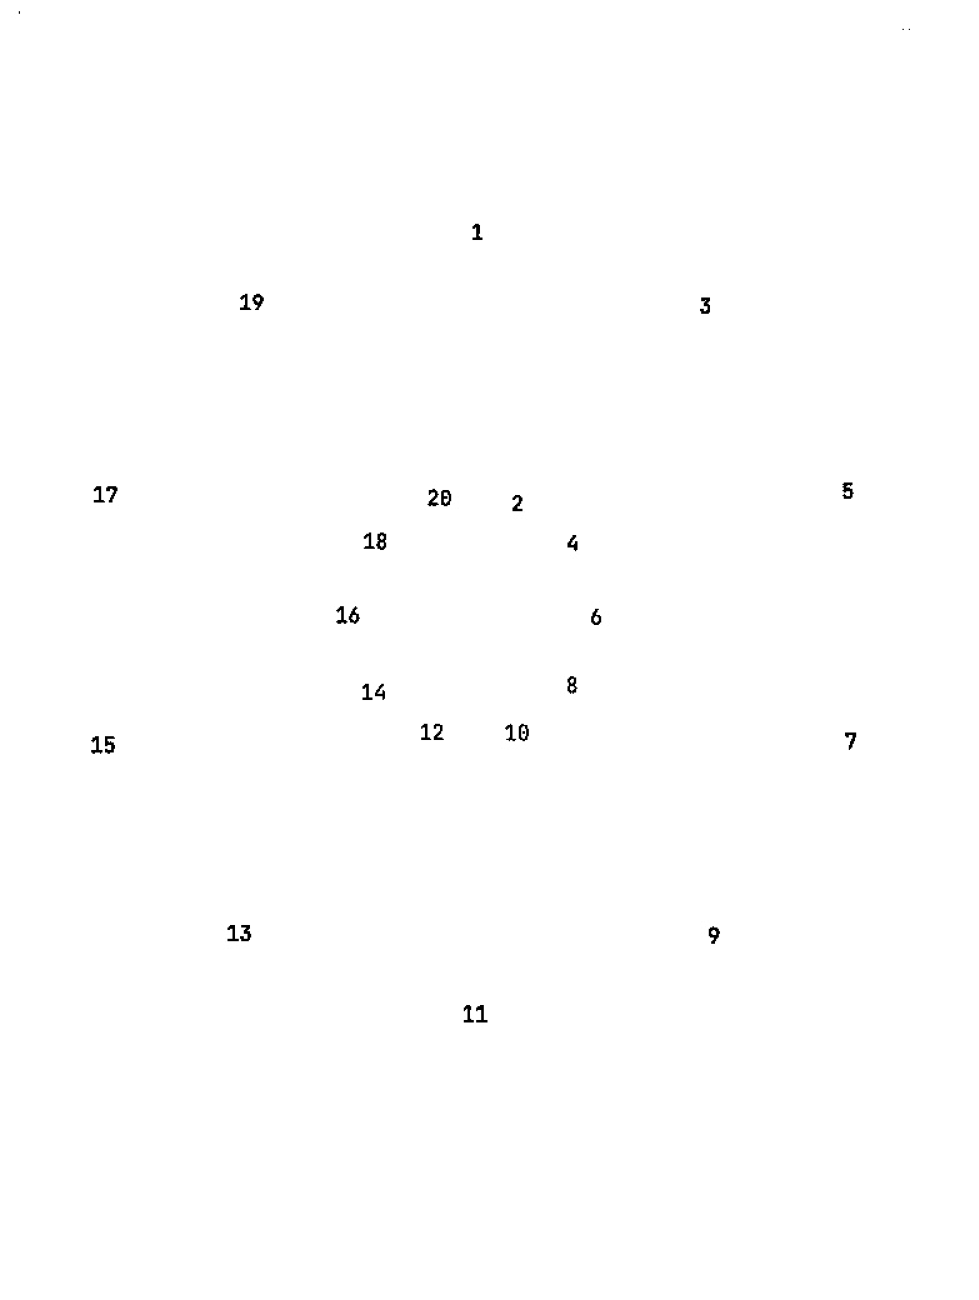

In [76]:
# Binarization
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


gray_img = grayscale(img)
cv2.imwrite("img/gray.jpg", gray_img)
# display("img/gray.jpg") cant display
thresh, im_bw = cv2.threshold(gray_img, 121, 255, cv2.THRESH_BINARY)
cv2.imwrite("img/binary.jpg", im_bw)

display("img/binary.jpg")

In [90]:
# Noise Removal
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    image = cv2.medianBlur(image, 3)
    return image

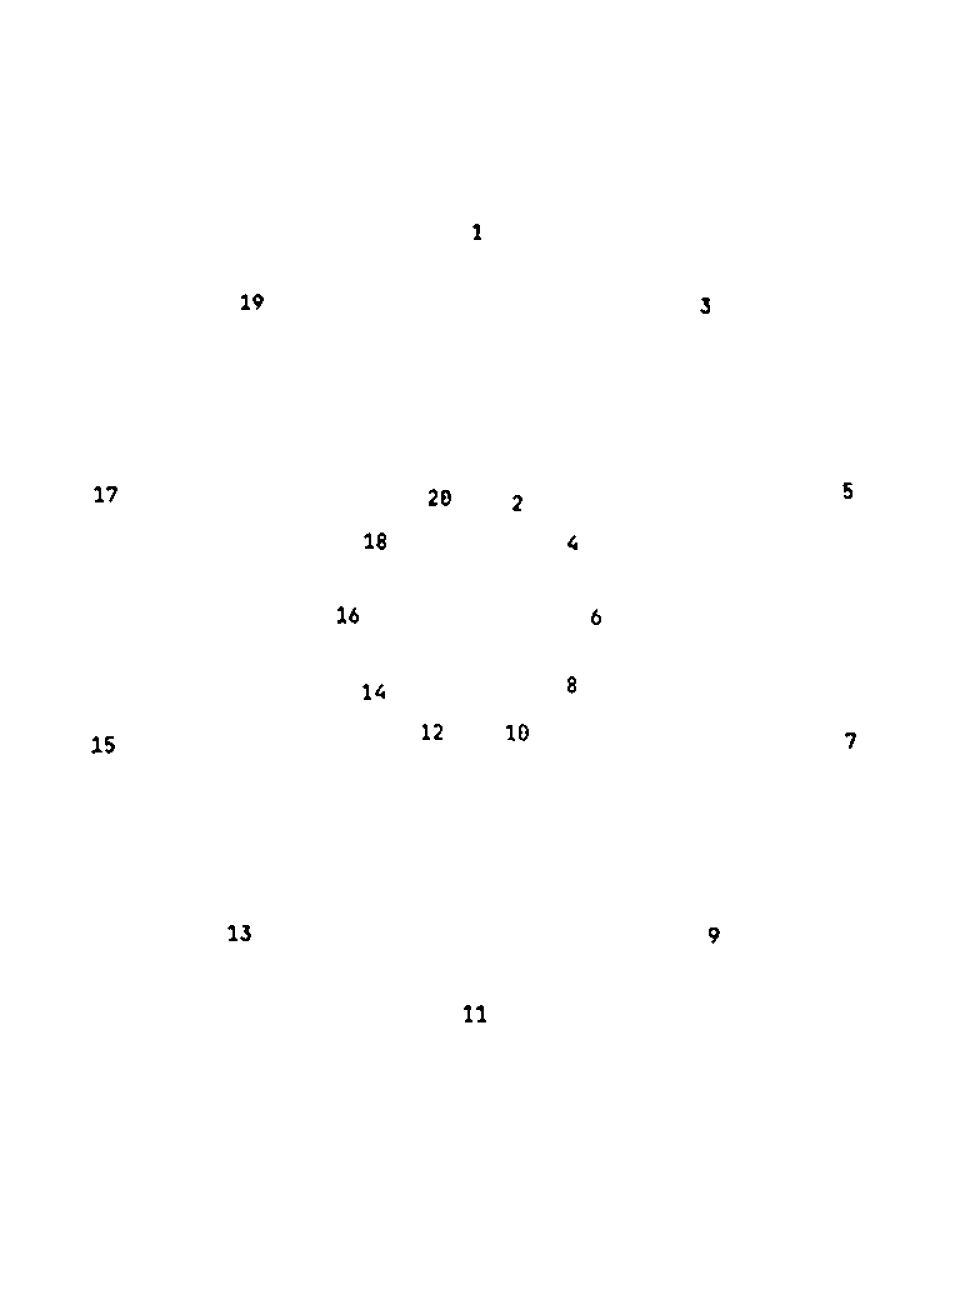

In [91]:
no_noise = noise_removal(im_bw)
cv2.imwrite("img/no_noise.jpg", no_noise)
display("img/no_noise.jpg")

In [79]:
# Dilation and Erosion
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2, 2), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image

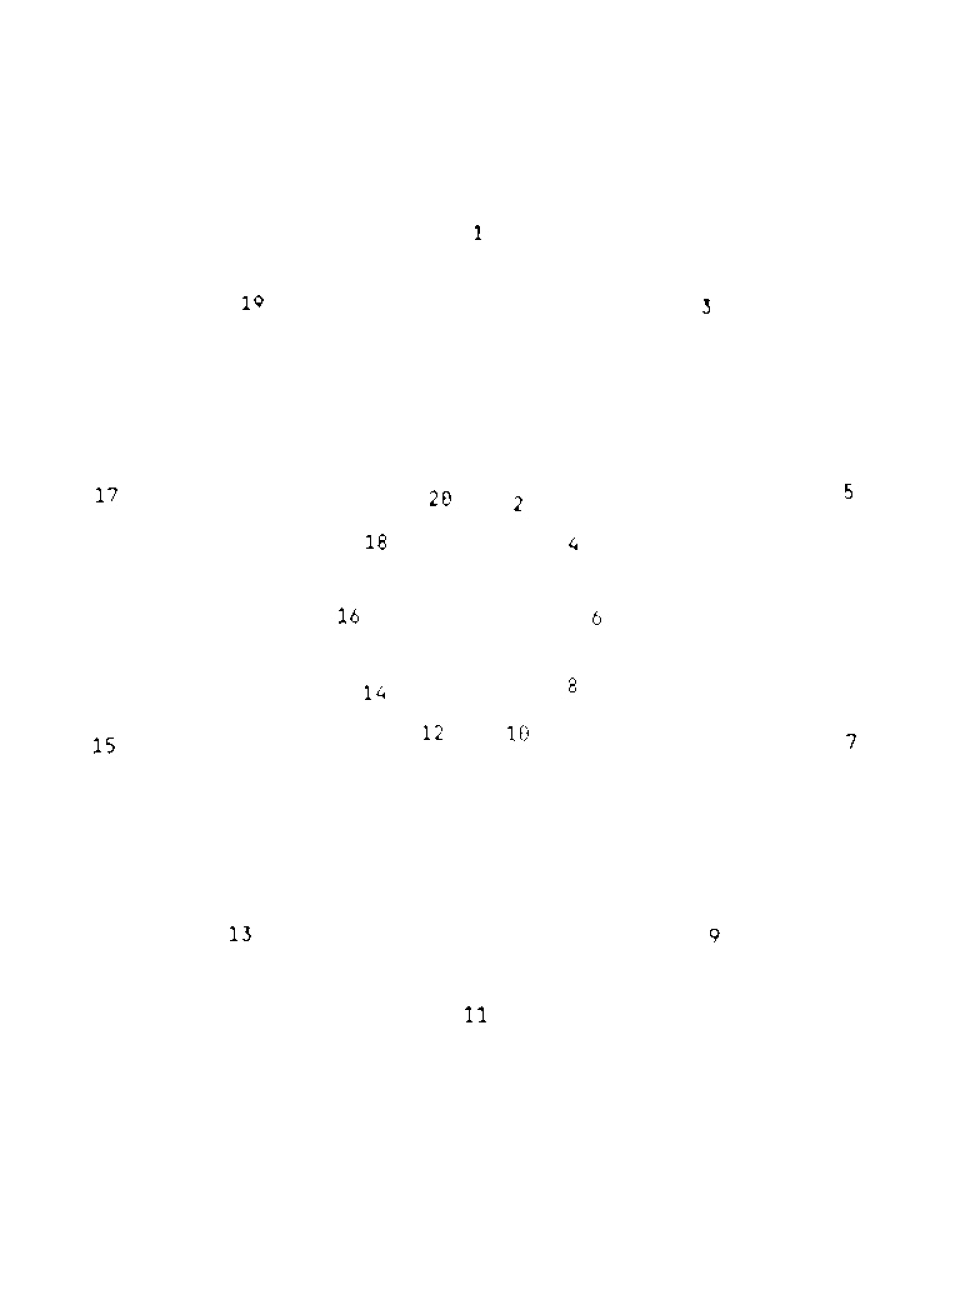

In [80]:
eroded_image = thin_font(no_noise)
cv2.imwrite("img/eroded.jpg", eroded_image)
display("img/eroded.jpg")

In [1]:
import easyocr

reader = easyocr.Reader(['en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [2]:
results = reader.readtext("img/eroded.jpg")

In [3]:
results

[([[67, 381], [89, 381], [89, 397], [67, 397]], '17', 0.9993088616587408),
 ([[333, 381], [357, 381], [357, 401], [333, 401]], '20', 0.9794307071958817),
 ([[281, 415], [305, 415], [305, 435], [281, 435]], '18', 0.9987188077360174),
 ([[259, 475], [283, 475], [283, 495], [259, 495]], '16', 0.9999969654282558),
 ([[327, 569], [351, 569], [351, 587], [327, 587]], '12', 0.999996375372952),
 ([[397, 571], [419, 571], [419, 587], [397, 587]], '1 €', 0.6016457752361232),
 ([[63, 579], [87, 579], [87, 599], [63, 599]], '15', 0.6857655703262899),
 ([[175, 733], [197, 733], [197, 749], [175, 749]], '13', 0.6566504103288763),
 ([[361, 793], [383, 793], [383, 813], [361, 813]], '11', 0.9901313090882201)]